## Regression: Hyundai Heavy Industry Cruise ship data
http://www.hyundai.eu

** Dataset Information: **

Measurements of ship size, capacity, crew, and age for 158 cruise ships

** Attribute Information: **

- Ship Name     1-20
- Cruise Line   21-40
- Age (as of 2013)   46-48
- Tonnage (1000s of tons)   50-56
- passengers (100s)   58-64
- Length (100s of feet)  66-72
- Cabins  (100s)   74-80
- Passenger Density   82-88
- Crew  (100s)   90-96

** Objective of this project **

predict how many crew members will be needed for future ships

## Data

In [131]:
#options(warn=-1)
# Load Data
df  <- read.csv('cruise_ship_info.csv')

In [132]:
# Inspect Data
head(df,3)
colnames(df)[9] <- 'label'

Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70


In [133]:
dim(df)

[1] 158   9

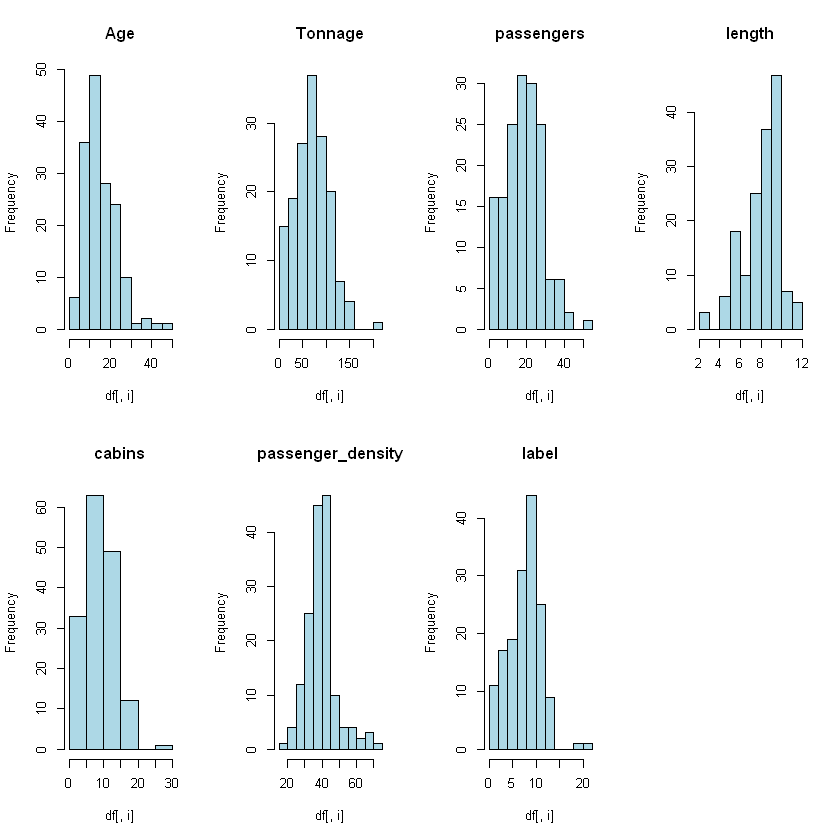

In [134]:
par(mfrow=c(2,4))
for(i in 3:9) {
    hist(df[,i], main=names(df)[i], col = 'lightblue')
}

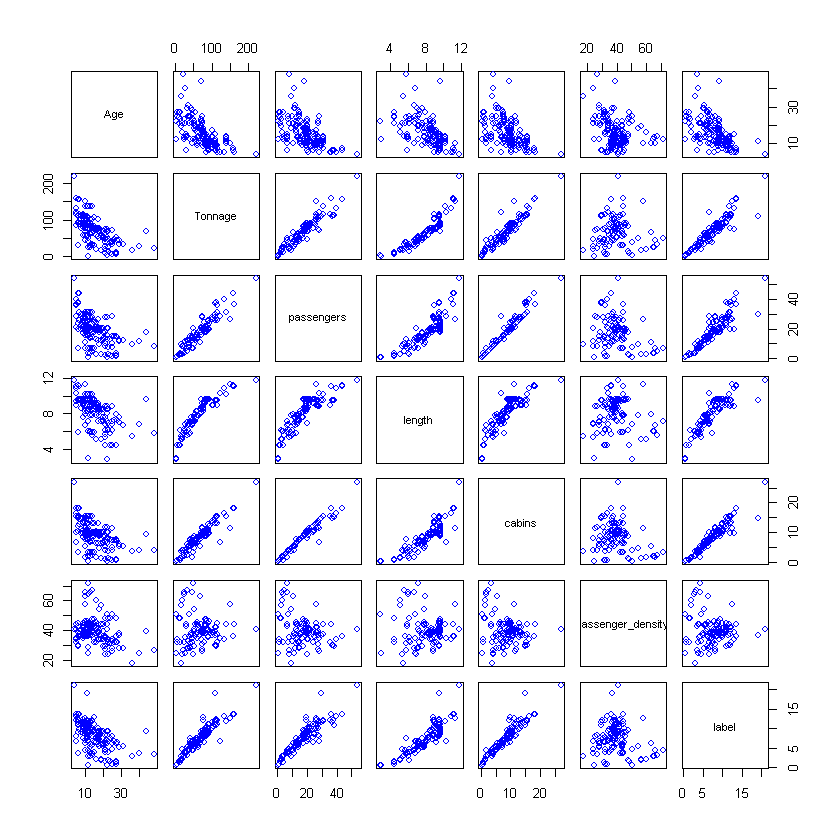

In [135]:
pairs(df[,3:9], col = 'blue')

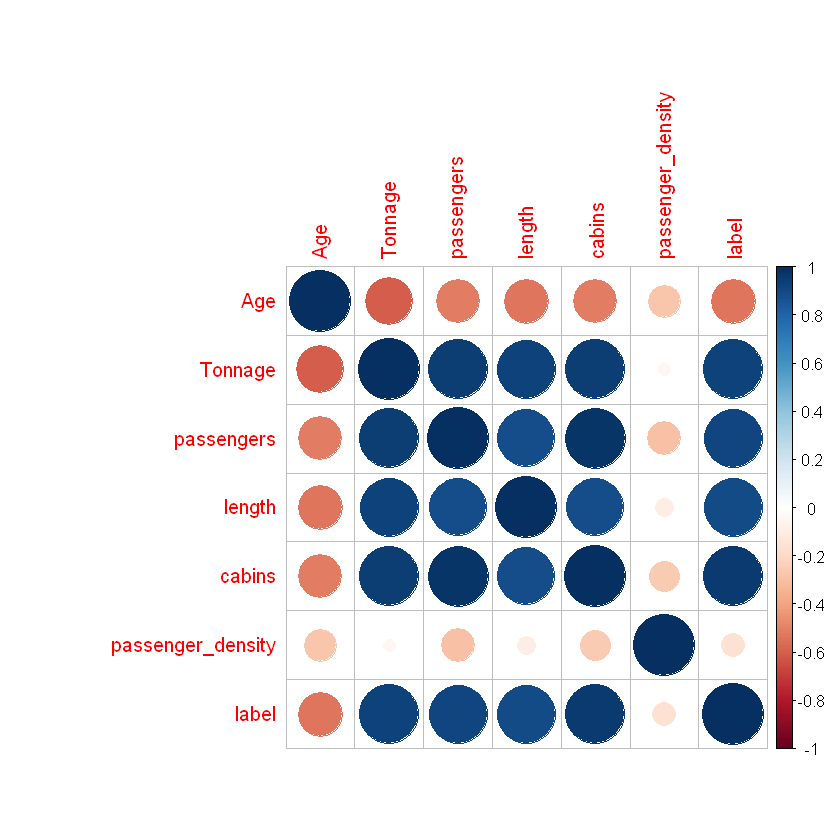

In [136]:
library(corrplot)
corrplot(cor(df[,3:9]), method="circle")

In [137]:
str(df)

'data.frame':	158 obs. of  9 variables:
 $ Ship_name        : Factor w/ 138 levels "Adventure","Allegra",..: 53 92 12 16 21 24 25 34 35 37 ...
 $ Cruise_line      : Factor w/ 20 levels "Azamara","Carnival",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ Age              : int  6 6 26 11 17 22 15 23 19 6 ...
 $ Tonnage          : num  30.3 30.3 47.3 110 101.4 ...
 $ passengers       : num  6.94 6.94 14.86 29.74 26.42 ...
 $ length           : num  5.94 5.94 7.22 9.53 8.92 8.55 8.55 8.55 8.55 9.51 ...
 $ cabins           : num  3.55 3.55 7.43 14.88 13.21 ...
 $ passenger_density: num  42.6 42.6 31.8 37 38.4 ...
 $ label            : num  3.55 3.55 6.7 19.1 10 9.2 9.2 9.2 9.2 11.5 ...


In [138]:
summary(df)

   Ship_name             Cruise_line      Age           Tonnage       
 Spirit :  4   Royal_Caribbean :23   Min.   : 4.00   Min.   :  2.329  
 Legend :  3   Carnival        :22   1st Qu.:10.00   1st Qu.: 46.013  
 Star   :  3   Princess        :17   Median :14.00   Median : 71.899  
 Crown  :  2   Holland_American:14   Mean   :15.69   Mean   : 71.285  
 Dawn   :  2   Norwegian       :13   3rd Qu.:20.00   3rd Qu.: 90.772  
 Freedom:  2   Costa           :11   Max.   :48.00   Max.   :220.000  
 (Other):142   (Other)         :58                                    
   passengers        length           cabins       passenger_density
 Min.   : 0.66   Min.   : 2.790   Min.   : 0.330   Min.   :17.70    
 1st Qu.:12.54   1st Qu.: 7.100   1st Qu.: 6.133   1st Qu.:34.57    
 Median :19.50   Median : 8.555   Median : 9.570   Median :39.09    
 Mean   :18.46   Mean   : 8.131   Mean   : 8.830   Mean   :39.90    
 3rd Qu.:24.84   3rd Qu.: 9.510   3rd Qu.:10.885   3rd Qu.:44.19    
 Max.   :54.00   M

In [139]:
any(is.na(df))

[1] FALSE

## Data preprocessing

In [140]:
library(caTools)
library(caret)
seed = 101 #random seed for reproducibility
set.seed(seed) 

In [141]:
df = df[-1] #drop shipname
label_col = 8

** Encode Categorical variable **

In [142]:
df$Cruise_line = factor(df$Cruise_line, 
                        levels=unique(df$Cruise_line),
                        labels=c(1:length(unique(df$Cruise_line))))
df$Cruise_line = as.numeric(df$Cruise_line)
str(df)

'data.frame':	158 obs. of  8 variables:
 $ Cruise_line      : num  1 1 2 2 2 2 2 2 2 2 ...
 $ Age              : int  6 6 26 11 17 22 15 23 19 6 ...
 $ Tonnage          : num  30.3 30.3 47.3 110 101.4 ...
 $ passengers       : num  6.94 6.94 14.86 29.74 26.42 ...
 $ length           : num  5.94 5.94 7.22 9.53 8.92 8.55 8.55 8.55 8.55 9.51 ...
 $ cabins           : num  3.55 3.55 7.43 14.88 13.21 ...
 $ passenger_density: num  42.6 42.6 31.8 37 38.4 ...
 $ label            : num  3.55 3.55 6.7 19.1 10 9.2 9.2 9.2 9.2 11.5 ...


** Split Train Test Sets **

In [144]:
split = sample.split(df$label, SplitRatio = 0.70)
train_set = subset(df, split == TRUE)
test_set = subset(df, split == FALSE)

** Scale features **

In [145]:
# standardize data
train_set[-label_col] = scale(train_set[-label_col])
test_set[-label_col] = scale(test_set[-label_col])
summary(train_set)

  Cruise_line             Age             Tonnage           passengers      
 Min.   :-1.510695   Min.   :-1.4805   Min.   :-1.83087   Min.   :-1.80459  
 1st Qu.:-1.010163   1st Qu.:-0.6723   1st Qu.:-0.68789   1st Qu.:-0.64258  
 Median :-0.009101   Median :-0.2008   Median : 0.03367   Median : 0.03495  
 Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.991962   3rd Qu.: 0.5400   3rd Qu.: 0.43806   3rd Qu.: 0.62644  
 Max.   : 1.659337   Max.   : 4.4465   Max.   : 3.70954   Max.   : 3.33803  
     length            cabins        passenger_density      label       
 Min.   :-2.9853   Min.   :-1.8701   Min.   :-2.50272   Min.   : 0.590  
 1st Qu.:-0.5952   1st Qu.:-0.5956   1st Qu.:-0.60867   1st Qu.: 5.910  
 Median : 0.2400   Median : 0.1136   Median :-0.01842   Median : 8.590  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 8.055  
 3rd Qu.: 0.7670   3rd Qu.: 0.5279   3rd Qu.: 0.52958   3rd Qu.:10.217  
 Max.   : 1.9792   Max.

## Baseline Model

In [146]:
# cross validation
trControl <- trainControl(method="cv", number=5)
metric <- 'RMSE'


Call:
summary.resamples(object = results)

Models: linear, pls, ridge, glmnet, svm, knn, mars, cart, bagging, rf, gbm 
Number of resamples: 5 

MAE 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
linear  0.5227644 0.5532873 0.6949216 0.6961204 0.7455428 0.9640857    0
pls     0.5147579 0.5586486 0.8072800 0.7681652 0.9141993 1.0459405    0
ridge   0.5217895 0.5523953 0.6925826 0.6954592 0.7462994 0.9642292    0
glmnet  0.4849993 0.4915056 0.7099870 0.6906780 0.7958657 0.9710326    0
svm     0.5239179 0.6103476 0.7585312 0.8041779 0.9921611 1.1359318    0
knn     0.7609524 0.8676364 0.9199048 0.9547724 0.9870909 1.2382778    0
mars    0.5214925 0.6237823 0.6287486 0.6728382 0.7022416 0.8879263    0
cart    1.1078345 1.1249218 1.2203176 1.2175540 1.2321826 1.4025136    0
bagging 0.8218268 0.8986197 0.9024122 0.9498289 1.0148496 1.1114360    0
rf      0.5346942 0.6021495 0.6414407 0.6661117 0.7148138 0.8374603    0
gbm     0.6008423 0.8056370 0.9214345 0.9114431

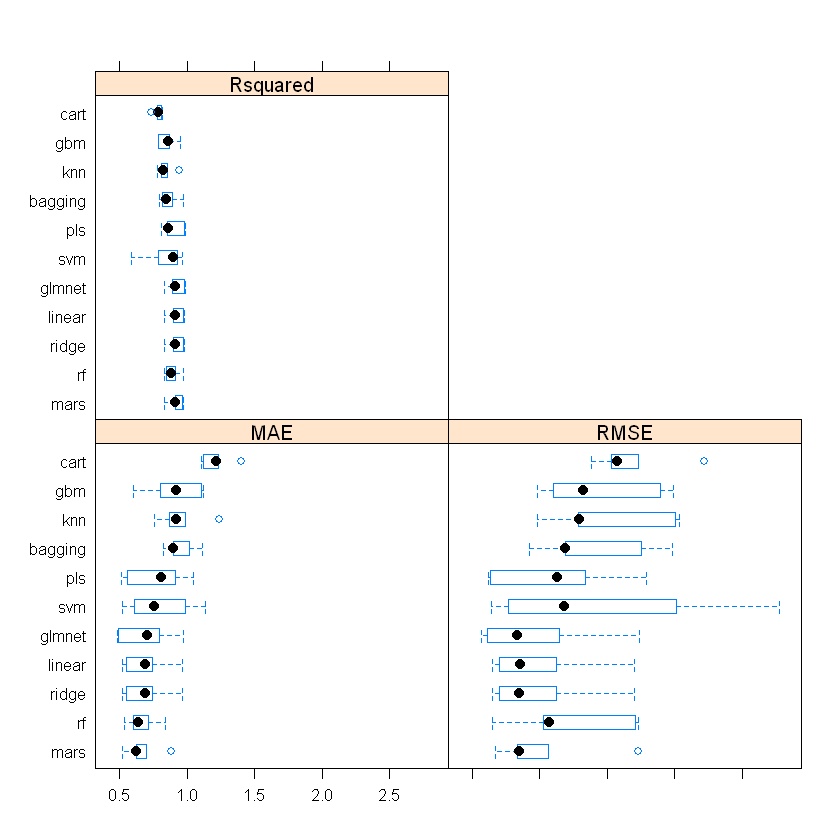

In [147]:
# train multiple models
# Linear Regression (Ordinary Least Squares;OLS) 
set.seed(seed)
fit.lm <- train(label~., data=train_set, method="lm", 
                 metric=metric, trControl=trControl)
# Partial Least Squares (PLS) Regression
set.seed(seed)
fit.pls <- train(label~., data=train_set, method="pls", 
                 metric=metric, trControl=trControl)
# Ridge
set.seed(seed)
fit.ridge <- train(label~., data=train_set, method="ridge", 
                 metric=metric, trControl=trControl)
# GLMNET (lasso, default alpha=1); Least Absolute Shrinkage and Selection Operator (LASSO)
set.seed(seed)
fit.glmnet <- train(label~., data=train_set, method="glmnet", 
                    metric=metric, trControl=trControl)
# SVM Radial (Support Vector Machine)
set.seed(seed)
fit.svmRadial <- train(label~., data=train_set, method="svmRadial", 
                       metric=metric, trControl=trControl, fit=FALSE)
# kNN
set.seed(seed)
fit.knn <- train(label~., data=train_set, method="knn", 
                 metric=metric, trControl=trControl)
# Bagged MARS (Multivariate Adaptive Regression Splines) 
set.seed(seed)
fit.bagEarth <- train(label~., data=train_set, method="bagEarth", 
                metric=metric, trControl=trControl)
# CART
set.seed(seed)
fit.cart <- train(label~., data=train_set, method="rpart", 
                  metric=metric, trControl=trControl)
# Bagged CART
set.seed(seed)
fit.treebag <- train(label~., data=train_set, method="treebag", 
                     metric=metric, trControl=trControl)
# Random Forest
set.seed(seed)
fit.rf <- train(label~., data=train_set, method="rf", 
                metric=metric, trControl=trControl)
# Stochastic Gradient Boosting
set.seed(seed)
fit.gbm <- train(label~., data=train_set, method="gbm", 
                 metric=metric, trControl=trControl, verbose=FALSE)

# summarise results
results <- resamples(list(linear=fit.lm, pls=fit.pls, ridge=fit.ridge,
                          glmnet=fit.glmnet, svm=fit.svmRadial, knn=fit.knn,
                          mars=fit.bagEarth, cart=fit.cart, bagging=fit.treebag,
                          rf=fit.rf, gbm=fit.gbm))
summary(results)
bwplot(results)

## Parameter Tuning
4 best algorithms by mean RMSE: ridge, linear, glmnet, pls

tuning parameters: http://topepo.github.io/caret/available-models.html

In [150]:
trControl <- trainControl(method='cv', number=5)
metric <- 'RMSE'

#### Model 1: glmnet

In [152]:
# default
fit.glmnet

glmnet 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results across tuning parameters:

  alpha  lambda       RMSE       Rsquared   MAE      
  0.10   0.006905397  0.9915053  0.9228503  0.6851753
  0.10   0.069053969  1.0055354  0.9186224  0.7019965
  0.10   0.690539691  1.1167361  0.9037621  0.7803871
  0.55   0.006905397  0.9917068  0.9223412  0.6862896
  0.55   0.069053969  0.9914603  0.9204645  0.6958601
  0.55   0.690539691  1.1514188  0.9119863  0.8283860
  1.00   0.006905397  0.9884390  0.9225980  0.6833817
  1.00   0.069053969  0.9812502  0.9220983  0.6906780
  1.00   0.690539691  1.2207706  0.9193856  0.8806503

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were alpha = 1 and lambda = 0.06905397.

glmnet 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results across tuning parameters:

  alpha  lambda       RMSE       Rsquared   MAE      
  0.0    0.000000000  1.0851872  0.9048703  0.7534578
  0.0    0.006905397  1.0851872  0.9048703  0.7534578
  0.0    0.010000000  1.0851872  0.9048703  0.7534578
  0.0    0.020000000  1.0851872  0.9048703  0.7534578
  0.0    0.030000000  1.0851872  0.9048703  0.7534578
  0.0    0.040000000  1.0851872  0.9048703  0.7534578
  0.0    0.050000000  1.0851872  0.9048703  0.7534578
  0.0    0.060000000  1.0851872  0.9048703  0.7534578
  0.0    0.100000000  1.0851872  0.9048703  0.7534578
  0.5    0.000000000  0.9996777  0.9217228  0.6913516
  0.5    0.006905397  0.9878715  0.9230711  0.6825361
  0.5    0.010000000  0.9851183  0.9231383  0.6792490
  0.5    0.020000000  0.9840424  0.9225040  0.6851950
  0.5    0.030000000  0.9846435  0.9219128  0.6910974
  0.5  

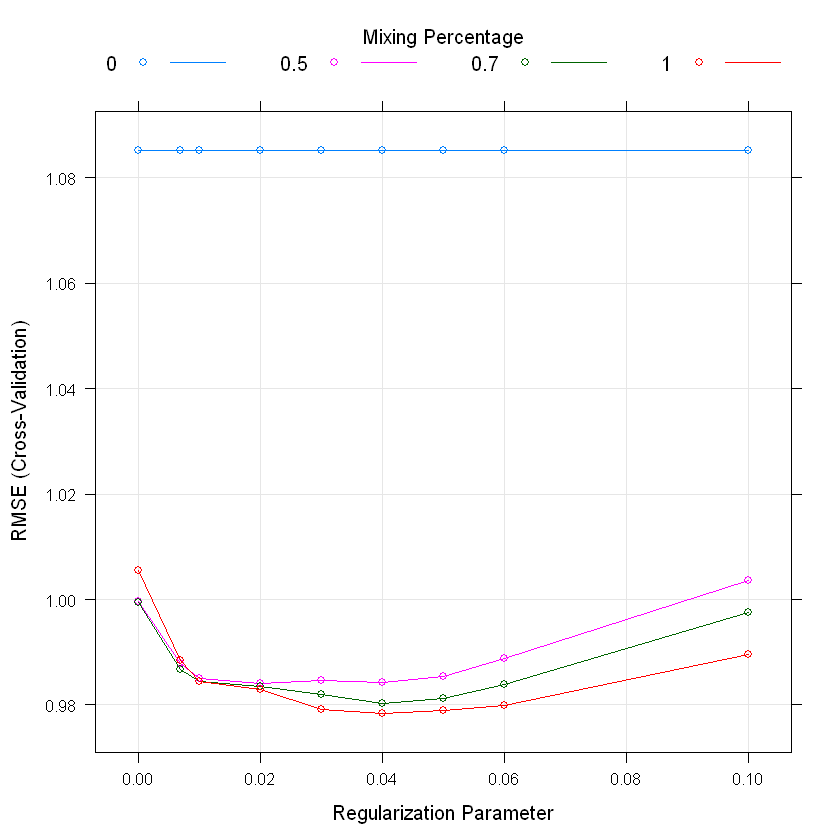

In [164]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(alpha = c(0,0.5,0.7,1), 
                       lambda = c(0,0.006905397,0.01,0.02,0.03,0.04,0.05,0.06,0.1))                       
gridSearch <- train(label~., data=train_set, method='glmnet',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

#### Model 2: Ridge

In [154]:
# default
fit.ridge

Ridge Regression 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   MAE      
  0e+00   1.008249  0.9207548  0.6961204
  1e-04   1.007123  0.9209177  0.6954592
  1e-01   1.127286  0.9045955  0.8017823

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 1e-04.

Ridge Regression 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results across tuning parameters:

  lambda  RMSE       Rsquared   MAE      
  0e+00   1.0082490  0.9207548  0.6961204
  1e-04   1.0071231  0.9209177  0.6954592
  1e-03   0.9988936  0.9220633  0.6906891
  1e-02   0.9951577  0.9213802  0.6946581
  1e-01   1.1272860  0.9045955  0.8017823
  1e+00   2.4291086  0.8967813  1.9189974

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was lambda = 0.01.


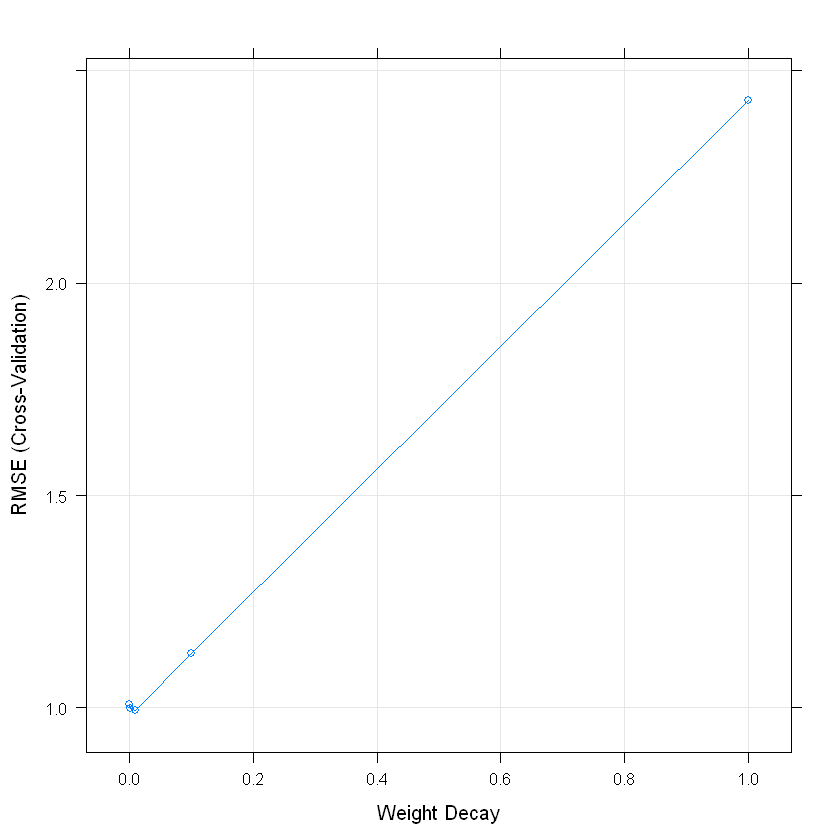

In [157]:
# grid search
set.seed(seed)
tuneGrid <- expand.grid(.lambda = c(0,1e-04,0.001,0.01,0.1,1))
gridSearch <- train(label~., data=train_set, method='ridge',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid, verbose=FALSE)
print(gridSearch)
plot(gridSearch)

#### Model 3: Linear Regression

In [148]:
# default --> no tuning parameters
fit.lm

Linear Regression 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results:

  RMSE      Rsquared   MAE      
  1.008249  0.9207548  0.6961204

Tuning parameter 'intercept' was held constant at a value of TRUE

#### Model 4. Bagged MARS

In [158]:
# default
fit.bagEarth

Bagged MARS 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results across tuning parameters:

  nprune  RMSE      Rsquared   MAE      
   2      1.331823  0.8816577  0.8516846
   8      1.109776  0.9163400  0.7244133
  14      1.031294  0.9216892  0.6728382

Tuning parameter 'degree' was held constant at a value of 1
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were nprune = 14 and degree = 1.

Bagged MARS 

110 samples
  7 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 86, 89, 88, 88, 89 
Resampling results across tuning parameters:

  degree  nprune  RMSE       Rsquared   MAE      
  1       14      1.0950000  0.9133520  0.7269449
  1       15      1.1285208  0.9123062  0.7048007
  1       16      1.0562527  0.9189157  0.6922121
  1       17      1.2621700  0.8884935  0.7707088
  1       18      1.5343291  0.8167384  0.8324907
  1       19      1.0796201  0.9155350  0.7144870
  1       20      1.0435305  0.9194017  0.6827379
  2       14      2.9481370  0.7489738  1.1444975
  2       15      1.1147147  0.9200084  0.6688509
  2       16      0.9761224  0.9284739  0.6373843
  2       17      1.1349214  0.9068518  0.6729667
  2       18      1.0173960  0.9251048  0.6461545
  2       19      1.0556321  0.9209609  0.6632004
  2       20      0.9829460  0.9286728  0.6215861

RMSE was used to select the optimal model using the smallest 

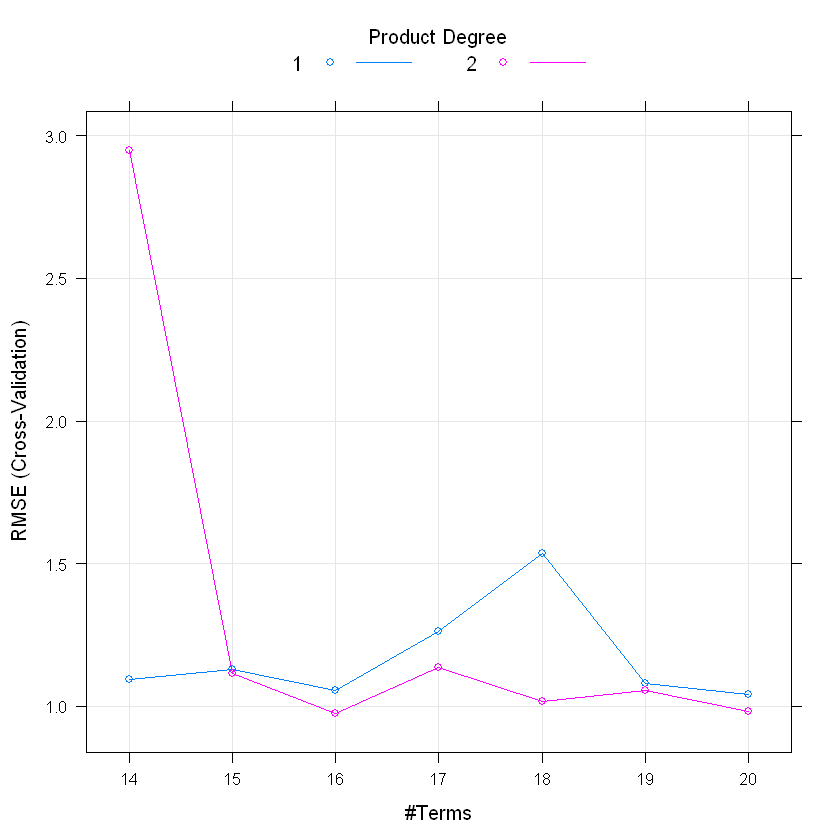

In [161]:
# grid search
set.seed(seed)
tuneGrid = expand.grid(.nprune=c(14:20),
                      .degree=c(1,2))
gridSearch <- train(label~., data=train_set, method='bagEarth',
                 metric=metric, trControl=trControl,
                 tuneGrid=tuneGrid)
print(gridSearch)
plot(gridSearch)

## Final Model: Bagged MARS

#### Params: nprune = 16 and degree = 2

In [180]:
set.seed(seed)
final.model <- earth(label~., data=train_set, 
                    nprune = 16, degree = 2)
print(final.model)

Selected 10 of 18 terms, and 6 of 7 predictors
Termination condition: Reached nk 21
Importance: cabins, Cruise_line, passenger_density-unused, passengers, ...
Number of terms at each degree of interaction: 1 6 3
GCV 1.012564    RSS 68.87504    GRSq 0.9243022    RSq 0.9523281


#### Save and load the final model

In [181]:
# save the model to disk
saveRDS(final.model, 'final_model.rds')
#rm(final.model)

In [182]:
# load the model
final.model <- readRDS('final_model.rds')
print(final.model)

Selected 10 of 18 terms, and 6 of 7 predictors
Termination condition: Reached nk 21
Importance: cabins, Cruise_line, passenger_density-unused, passengers, ...
Number of terms at each degree of interaction: 1 6 3
GCV 1.012564    RSS 68.87504    GRSq 0.9243022    RSq 0.9523281


#### Final Model Evaluation with Test set

In [183]:
# make predictions
predictions <- predict(final.model, test_set[-label_col])
# evaluate the model
postResample(pred = predictions, obs = test_set$label)

RMSE  Rsquared       MAE 
2.0142710 0.7497761 1.3647122

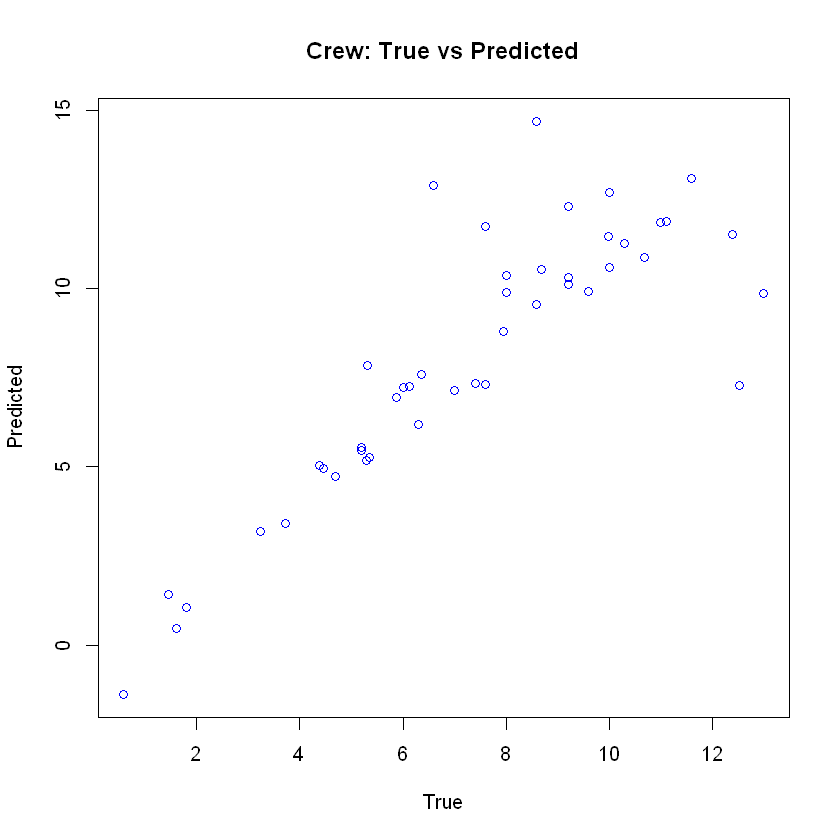

In [188]:
plot(x=test_set$label, y=predictions, col = 'blue',  
     xlab = 'True', ylab = 'Predicted',
     main='Crew: True vs Predicted')

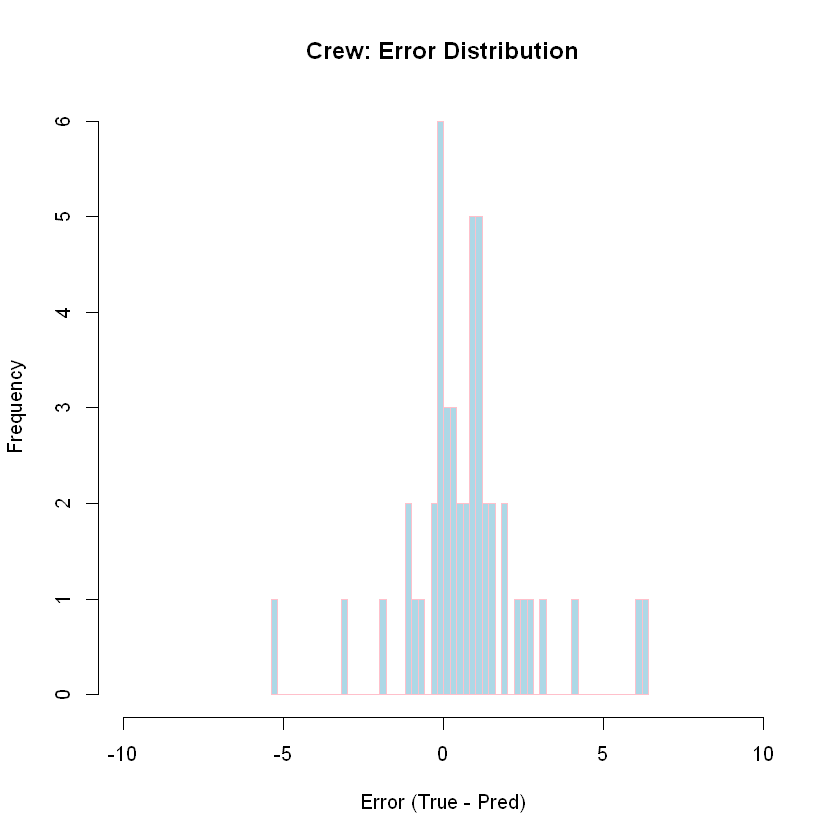

In [187]:
hist((predictions-test_set$label), breaks = 50,
     col = 'lightblue', border = 'pink',
     xlab = 'Error (True - Pred)',
     main='Crew: Error Distribution',
     xlim = c(-10, 10))

## Summary

- Best model: **Bagged MARS** w/ param: nprune = 16, degree = 2


- RMSE / R2 score of test set: ** 2.01 / 0.75 **